In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x, y)  

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

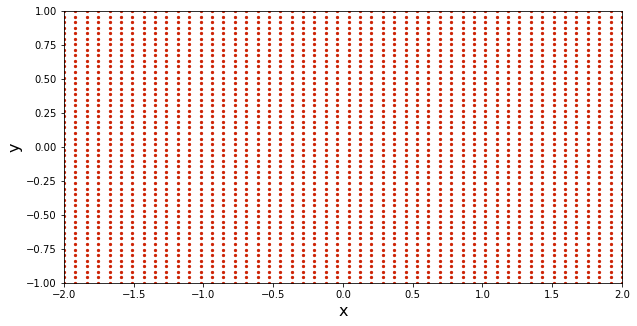

In [4]:
# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X, Y, s=5, color='#CD2305', marker='o')

## Source

In [33]:
strength_source = 5.0                      # source strength
x_source, y_source = -2.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

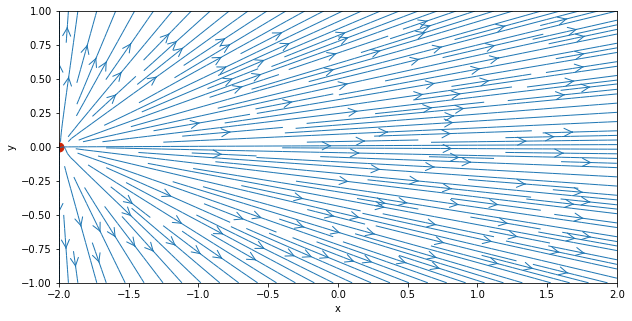

In [34]:
width = 10.0

height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

plt.streamplot(X, Y, u_source, v_source, density = 2, 
linewidth = 1, arrowsize = 2, arrowstyle = '->')

plt.scatter(x_source, y_source, color = '#CD2305', s = 80, marker = 'o')

## Sink

In [132]:
def field(strength, x, y):
    strength = strength                  # strength of the sink

    # compute the velocity on the mesh grid
    u = (strength / (2 * math.pi) *
            (X - x) / ((X - x)**2 + (Y - y)**2))
    v = (strength / (2 * math.pi) *
            (Y - y) / ((X - x)**2 + (Y - y)**2))

    return u, v

u_source1, v_source1 = field(10, -2, 0)
u_source2, v_source2 = field(10, 2, 0)

u_sink1, v_sink1 = field(-3, 2, 1)
u_sink2, v_sink2 = field(-3, 2, -1)
u_sink3, v_sink3 = field(-3, -2, -1)
u_sink4, v_sink4 = field(-3, -2, 1)

u_sink5, v_sink5 = field(-4, -0.5, 0)
u_sink6, v_sink6 = field(-4, -0.5, 0)


<ipython-input-132-302b3bdce3fe>:5: RuntimeWarning: invalid value encountered in true_divide
  u = (strength / (2 * math.pi) *
<ipython-input-132-302b3bdce3fe>:7: RuntimeWarning: invalid value encountered in true_divide
  v = (strength / (2 * math.pi) *


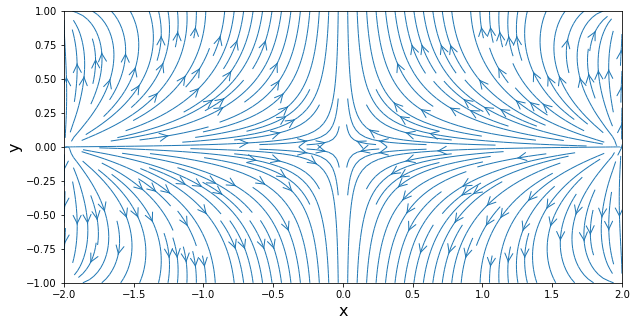

In [133]:
# compute the velocity of the pair source/sink by superposition
u_pair = u_source1 + u_source2 + u_sink1 + u_sink2 + u_sink3 + u_sink4
v_pair = v_source1 + v_source2 + v_sink1 + v_sink2 + v_sink3 + v_sink4

# plot the streamlines of the pair source/sink
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_pair, v_pair,
                  density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')


In [134]:
#仿doublet障碍物

kappa = 0.05 #strength of the doublet

x_doublet, y_doublet = -1, -0.5

def get_velocity_doublet(strength, xd, yd, X, Y):

    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):

    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

x_tests = np.linspace(-2, 2, 200)

wall_field = []

for i in x_tests:
    wall_field.append(get_velocity_doublet(kappa, i, 1, X, Y))


<ipython-input-134-12b132025f0b>:9: RuntimeWarning: invalid value encountered in true_divide
  u = (- strength / (2 * math.pi) *
<ipython-input-134-12b132025f0b>:12: RuntimeWarning: invalid value encountered in true_divide
  v = (- strength / (2 * math.pi) *


In [135]:
cmap = plt.get_cmap('Blues_r')

In [136]:
u[0][25],u[15][25],v[0][25],v[15][25]

u[0][25]**2 + v[0][25]**2, u[15][25]**2 + v[15][25]**2

(0.3342614294662508, 0.1244900067586887)

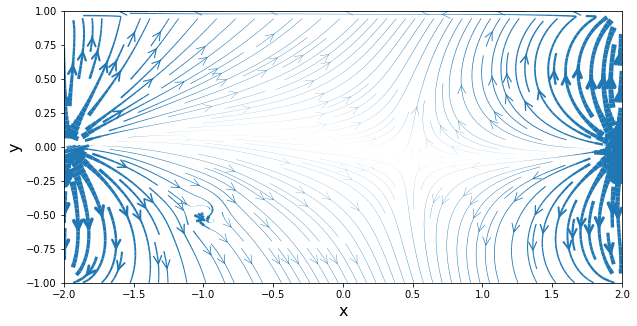

In [158]:
# compute the velocity of the pair source/sink by superposition
u = u_source1 + u_source2 + u_sink1 + u_sink2 + u_sink3 + u_sink4 + u_doublet
v = v_source1 + v_source2 + v_sink1 + v_sink2 + v_sink3 + v_sink4 + v_doublet

for stuff in wall_field:
    u += stuff[0]
    v += stuff[1]

# plot the streamlines of the pair source/sink
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

speed = np.sqrt(u**2 + v**2)

lw =  speed / speed.max() * 100

strm = plt.streamplot(X, Y, u, v,
                  density=2, linewidth= v, arrowsize=2, arrowstyle='->')


In [149]:
v[25][25], v[0][25]

(0.011975361331133975, -0.3896257675863433)